<a href="https://colab.research.google.com/github/kaish114/Elucidata-Assignment-Internship/blob/master/Elucidata_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Elucidata Internship Assignment**

#1. Introduction
[Article by WHO: World Health Organization](https://www.who.int/news-room/fact-sheets/detail/cancer)


In 2017, the World Health Assembly passed the resolution Cancer Prevention and Control through an Integrated Approach (WHA70.12) urges governments and WHO to accelerate action to achieve the targets specified in the Global Action Plan and 2030 UN Agenda for Sustainable Development to reduce premature mortality from cancer. 
* [WHA70.12:  Cancer prevention and control in the context of an integrated approach](http://apps.who.int/gb/ebwha/pdf_files/WHA70-REC1/A70_2017_REC1-en.pdf#page=27)

* [Global action plan for the prevention and control of NCDs 2013-2020](http://www.who.int/entity/nmh/publications/ncd-action-plan/en/index.html)


Data Analysis of the **cancers patient** based on their **genes structure**.

### Cancers


1. Cancer arises from the transformation of normal cells into tumour cells in a multistage process that generally progresses from a pre-cancerous lesion to a malignant tumour. 

1. WHO, through its cancer research agency, International Agency for Research on Cancer (IARC), maintains a classification of cancer-causing agents.

1. Cancer is a leading cause of death worldwide, accounting for an estimated 9.6 million deaths in 2018. The most common cancers are:
 * Lung (2.09 million cases)
 * Breast (2.09 million cases)
 * Colorectal (1.80 million cases)
 * Prostate (1.28 million cases)
 * Skin cancer (non-melanoma) (1.04 million cases)
 * Stomach (1.03 million cases)

1. The most common causes of cancer death are cancers of:
  * Lung (1.76 million deaths)
  * Colorectal (862 000 deaths)
  * Stomach (783 000 deaths)
  * Liver (782 000 deaths)
  * Breast (627 000 deaths)




5. **Pancreatic Adenocarcinoma (PAAD)** is the third most common cause of death from cancer, with an overall 5-year survival rate of less than 5%, and is predicted to become the second leading cause of cancer mortality in the United States by 2030.

1. Cancer mortality can be reduced if cases are detected and treated early. In this assignment we are going to analyse the previous data of **genes structure** to detect the cancer patient and provide early treatment.

1. **Genes Structures**: **Ribonucleic acid (RNA)** is a polymeric molecule essential in various biological roles in coding, decoding, regulation and expression of genes. RNA and DNA are nucleic acids, and, along with lipids, proteins and carbohydrates, constitute the four major macromolecules essential for all known forms of life. **RNA-Seq (RNA sequencing)**, is a sequencing technique to detect the quantity of RNA in a biological sample at a given moment.

###Pursue prevention strategies

To prevent cancer, people may:

    increase avoidance of the risk factors;
    vaccinate against HPV and hepatitis B virus;
    control occupational hazards;
    reduce exposure to ultraviolet radiation;
    reduce exposure to ionizing radiation (occupational or medical diagnostic imaging).

Vaccination against these HPV and hepatitis B viruses could prevent 1 million cancer cases each year3.

##Reference: [WHO: World Health Organization](https://www.who.int/news-room/fact-sheets/detail/cancer)


#2. Importing Important Libraries
I will use following libraries:

* numpy for working with linear algebra
* pandas for working with data(dataframes)
* matplotlib and seaborn for plotting graphs i.e. visualization

In [44]:
#Importing Important Libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #data visualization, plotting graphs
import seaborn as sns

# Installing and importing the python 'package' ​cmapPy​ that will be used for reading GCTs in python
!pip install cmapPy
from cmapPy.pandasGEXpress.parse import parse
import cmapPy.pandasGEXpress.parse_gct as pg

In [0]:
#Python Version
!python --version

Python 3.6.9


#3. Data Exploration And Analysis

* Here we have a dataset of normalized RNA Sequencing reads for pancreatic cancer tumors. The measurement consists of ~20,000 genes for 185 pancreatic cancer tumors. The **file format is GCT** , a tab-delimited file used for sharing gene expression data and metadata (details for each sample) for samples.
* **GCT file:** The GCT file format, a tab-delimited text-based format pairing matrix expression values with row and column metadata, allowing comparison of both transcriptional and contextual differences across samples. A schematic of a sample GCT file is pictured below.
![gct data format](https://www.genepattern.org/uploaded/content_file_gct_format_snapshot.gif)

[More about GCT File Format](https://www.genepattern.org/file-formats-guide#GCT)



### Load Dataset

Now I'll import dataset and explore it.

In [0]:
#Loading Dataset for Exploration

data = parse('PAAD.gct')

In [46]:
#Type of dataset
print(type(data))

<class 'cmapPy.pandasGEXpress.GCToo.GCToo'>


We have 3 component dataframes:
* row_metadata_df
* column_metadata_df
* data_df

Lets explore each of them.

In [0]:
# Read all portion of data
column_metadata = data.col_metadata_df #col_metadata
row_metadata = data.row_metadata_df #row_metadata
data_matrix = data.data_df #data_matrix

Considering only Columns meta data

In [48]:
# Columns meta data
#First five rows
column_metadata.head()

chd,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,alcohol_history_documented,alcoholic_exposure_category,amount_of_alcohol_consumption_per_day,anatomic_neoplasm_subdivision,anatomic_neoplasm_subdivision_other,b_symptoms,bcr,bcr_aliquot_uuid,bcr_canonical_reason-2,bcr_canonical_reason-3,bcr_canonical_reason,bcr_followup_barcode,bcr_followup_uuid,bcr_patient_canonical_status,clinical_m,clinical_n,clinical_stage,clinical_t,course_number,day_of_dcc_upload,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_index,days_to_initial_pathologic_diagnosis,days_to_pancreatitis_onset,days_to_psa,disease_code,drugs,...,person_neoplasm_cancer_status,prescribed_dose,prescribed_dose_units,primary_lymph_node_presentation_assessment,primary_pattern,primary_therapy_outcome_success,progression_determined_by-3,project_code,psa_value,race,radiation_therapy,radiation_type_notes,radiations,regimen_number,relative_cancer_type-2,relative_cancer_type,residual_tumor,route_of_administration,secondary_pattern,serum_markers,source_of_patient_death_reason,stopped_smoking_year,surgery_performed_type,system_version,targeted_molecular_therapy,tertiary_pattern,therapy_type_notes,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,tissue_source_site,tobacco_smoking_history,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,1.0,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66.0,NaN,NaN,yes,65,yes,weekly drinker,1.0,head of pancreas,NaN,NaN,nationwide children's hospital,d3f960b2-c69d-4b64-a30f-72f4fa7bb2f9,NaN,NaN,NaN,NaN,NaN,canonical,NaN,NaN,NaN,NaN,NaN,21,5,-23962,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,complete remission/response,NaN,tcga,NaN,white,no,NaN,NaN,NaN,NaN,NaN,r0,NaN,NaN,NaN,medical record,1988.0,whipple,7,yes,NaN,NaN,no,yes,2j,3.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,1962.0
aab4-Primary solid Tumor,aab4,Primary solid Tumor,2.0,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729.0,NaN,yes,48,no,NaN,NaN,other (please specify),body & tail of pancreas,NaN,nationwide children's hospital,9daae9d7-747e-44e0-a8f8-3c3f9e3f03f3,NaN,NaN,NaN,tcga-2j-aab4-f62444,ce0b8128-82b9-4164-808f-1b4447134f54,canonical,NaN,NaN,NaN,NaN,NaN,21,16,-17794,NaN,0.0,0.0,-292.0,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,complete remission/response,NaN,tcga,NaN,white,no,NaN,NaN,NaN,NaN,NaN,r0,NaN,NaN,NaN,NaN,NaN,distal pancreatectomy,7,yes,NaN,NaN,no,yes,2j,5.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab6-Primary solid Tumor,aab6,Primary solid Tumor,3.0,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293.0,NaN,NaN,yes,75,no,NaN,NaN,body of pancreas,NaN,NaN,nationwide children's hospital,c850368e-6e95-4879-8245-205ddeec6fbd,NaN,NaN,NaN,NaN,NaN,canonical,NaN,NaN,NaN,NaN,NaN,21,5,-27600,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,with tumor,NaN,NaN,yes,NaN,progressive disease,NaN,tcga,NaN,white,no,NaN,NaN,NaN,NaN,NaN,r0,NaN,NaN,NaN,medical record,NaN,distal pancreatectomy,7,yes,NaN,NaN,no,yes,2j,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab8-Primary solid Tumor,aab8,Primary solid Tumor,1.0,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NaN,80.0,NaN,yes,71,no,NaN,NaN,head of pancreas,NaN,NaN,nationwide children's hospital,5749429c-5ac9-40de-b44e-3b795520ec07,NaN,NaN,NaN,tcga-2j-aab8-f62434,daf7d897-0ed7-48ec-ae70-080dd8d7d6bd,canonical,NaN,NaN,NaN,NaN,NaN,21,16,-26028,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,NaN,NaN,tcga,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,r1,NaN,NaN,NaN,NaN,NaN,whipple,7,yes,NaN,NaN,no,yes,2j,NaN,NaN,NaN,panc

In [49]:
#Last five data point 
column_metadata.tail()

chd,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,alcohol_history_documented,alcoholic_exposure_category,amount_of_alcohol_consumption_per_day,anatomic_neoplasm_subdivision,anatomic_neoplasm_subdivision_other,b_symptoms,bcr,bcr_aliquot_uuid,bcr_canonical_reason-2,bcr_canonical_reason-3,bcr_canonical_reason,bcr_followup_barcode,bcr_followup_uuid,bcr_patient_canonical_status,clinical_m,clinical_n,clinical_stage,clinical_t,course_number,day_of_dcc_upload,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_index,days_to_initial_pathologic_diagnosis,days_to_pancreatitis_onset,days_to_psa,disease_code,drugs,...,person_neoplasm_cancer_status,prescribed_dose,prescribed_dose_units,primary_lymph_node_presentation_assessment,primary_pattern,primary_therapy_outcome_success,progression_determined_by-3,project_code,psa_value,race,radiation_therapy,radiation_type_notes,radiations,regimen_number,relative_cancer_type-2,relative_cancer_type,residual_tumor,route_of_administration,secondary_pattern,serum_markers,source_of_patient_death_reason,stopped_smoking_year,surgery_performed_type,system_version,targeted_molecular_therapy,tertiary_pattern,therapy_type_notes,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,tissue_source_site,tobacco_smoking_history,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a89d-Solid Tissue Normal,a89d,Solid Tissue Normal,NaN,tcga-yb-a89d,b84b58c7-95b8-4162-8e61-414f8fe422c6,alive,NaN,350.0,NaN,yes,59,no,NaN,NaN,head of pancreas,NaN,NaN,nationwide children's hospital,12ef6f0f-ca63-4139-a4f1-6ad86fc7db61,case matched methylation control,germline comparison,case matched expression control,tcga-yb-a89d-f67752,928ecaa3-6182-42fd-95f8-ec1ce3195d8b,canonical - plus,NaN,NaN,NaN,NaN,NaN,21,11,-21792,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,complete remission/response,NaN,tcga,NaN,white,yes,NaN,NaN,NaN,NaN,other,r0,NaN,NaN,NaN,NaN,NaN,whipple,7,yes,NaN,NaN,yes,no,yb,1.0,NaN,NaN,pancreas,primary,false,2016,2014,2013.0,NaN
a89d-Primary solid Tumor,a89d,Primary solid Tumor,2.0,tcga-yb-a89d,b84b58c7-95b8-4162-8e61-414f8fe422c6,alive,NaN,350.0,NaN,yes,59,no,NaN,NaN,head of pancreas,NaN,NaN,nationwide children's hospital,12ef6f0f-ca63-4139-a4f1-6ad86fc7db61,case matched methylation control,germline comparison,case matched expression control,tcga-yb-a89d-f67752,928ecaa3-6182-42fd-95f8-ec1ce3195d8b,canonical - plus,NaN,NaN,NaN,NaN,NaN,21,11,-21792,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,complete remission/response,NaN,tcga,NaN,white,yes,NaN,NaN,NaN,NaN,other,r0,NaN,NaN,NaN,NaN,NaN,whipple,7,yes,NaN,NaN,yes,no,yb,1.0,NaN,NaN,pancreas,primary,false,2016,2014,2013.0,NaN
a8sy-Primary solid Tumor,a8sy,Primary solid Tumor,3.0,tcga-yh-a8sy,503d7e36-df78-428d-9971-09ff707645c2,alive,NaN,388.0,NaN,yes,73,yes,weekly drinker,NaN,head of pancreas,NaN,NaN,nationwide children's hospital,50e76899-a6c1-4e0f-943c-025352a012ec,NaN,NaN,NaN,NaN,NaN,canonical,NaN,NaN,NaN,NaN,NaN,21,13,-26859,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,NaN,NaN,NaN,yes,NaN,NaN,NaN,tcga,NaN,white,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,whipple,7,yes,NaN,NaN,no,yes,yh,1.0,NaN,NaN,pancreas,primary,false,2016,2014,2011.0,NaN
a8lh-Primary solid Tumor,a8lh,Primary solid Tumor,1.0,tcga-yy-a8lh,ede2e8a7-465e-4725-880d-519899aba0c0,alive,NaN,2016.0,NaN,yes,61,yes,occasional drinker,NaN,tail of pancreas,NaN,NaN,nationwide children's hospital,893dfe82-0fcb-49c5-8d0e-04b112d524f2,NaN,NaN,NaN,tcga-yy-a8lh-f66996,924c1390-003e-4190-8e65-f5c9faa23610,canonical,NaN,NaN,NaN,NaN,NaN,21,29,-22376,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,tumor free,Na

In [8]:
#Describing Column metadata
column_metadata.describe()

chd,mRNAseq_cluster,days_to_death,days_to_last_followup,additional_studies,age_at_initial_pathologic_diagnosis,amount_of_alcohol_consumption_per_day,b_symptoms,clinical_m,clinical_n,clinical_stage,clinical_t,course_number,day_of_dcc_upload,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_index,days_to_initial_pathologic_diagnosis,days_to_pancreatitis_onset,days_to_psa,drugs,extranodal_involvement,follow_ups,frequency_of_alcohol_consumption,gleason_score,hiv_status,icd_o_3_histology,igcccg_stage,lymph_node_examined_count,masaoka_stage,maximum_tumor_dimension,mononucleotide_marker_panel_analysis_status,month_of_dcc_upload,month_of_form_completion,number_cycles,number_of_lymphnodes_positive_by_he,number_of_lymphnodes_positive_by_ihc,number_pack_years_smoked,prescribed_dose,prescribed_dose_units,primary_pattern,psa_value,radiation_type_notes,radiations,regimen_number,route_of_administration,secondary_pattern,serum_markers,stopped_smoking_year,system_version,tertiary_pattern,therapy_type_notes,tobacco_smoking_history,total_dose,total_dose_units,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
count,178.000000,95.000000,88.000000,0.0,183.000000,32.00000,0.0,0.0,0.0,0.0,0.0,0.0,183.0,183.000000,183.000000,14.000000,182.0,182.0,11.000000,0.0,0.0,0.0,0.0,33.000000,0.0,0.0,183.000000,0.0,179.000000,0.0,169.000000,0.0,183.0,183.000000,0.0,179.000000,58.0,59.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.000000,183.000000,0.0,0.0,148.000000,0.0,0.0,183.0,183.000000,182.000000,48.000000
mean,2.977528,450.547368,684.068182,NaN,64.584699,1.56250,NaN,NaN,NaN,NaN,NaN,NaN,21.0,18.289617,-23784.530055,-706.785714,0.0,0.0,-1744.181818,NaN,NaN,NaN,NaN,4.878788,NaN,NaN,8439.142077,NaN,17.301676,NaN,3.918343,NaN,1.0,7.617486,NaN,2.955307,0.0,26.006780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990.288462,6.890710,NaN,NaN,2.209459,NaN,NaN,2016.0,2013.852459,2011.241758,1970.708333
std,1.389855,362.449227,544.823240,NaN,11.011592,0.86835,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.127118,4015.848920,2416.811987,0.0,0.0,5402.658194,NaN,NaN,NaN,NaN,2.417483,NaN,NaN,130.753907,NaN,8.946065,NaN,1.768631,NaN,0.0,3.015732,NaN,3.414808,0.0,18.191577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.212240,0.312858,NaN,NaN,1.294958,NaN,NaN,0.0,0.569443,1.761094,13.022008
min,1.000000,12.000000,0.000000,NaN,35.000000,0.50000,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1.000000,-32475.000000,-9070.000000,0.0,0.0,-18029.000000,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,8020.000000,NaN,1.000000,NaN,0.300000,NaN,1.0,1.000000,NaN,0.000000,0.0,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.000000,6.000000,NaN,NaN,1.000000,NaN,NaN,2016.0,2012.000000,2001.000000,1948.000000
25%,2.000000,227.000000,347.000000,NaN,57.000000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,21.0,9.000000,-26816.000000,-163.000000,0.0,0.0,-231.500000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,8500.000000,NaN,11.000000,NaN,3.000000,NaN,1.0,6.000000,NaN,0.000000,0.0,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979.750000,7.000000,NaN,NaN,1.000000,NaN,NaN,2016.0,2014.000000,2011.000000,1960.000000
50%,3.000000,393.000000,507.500000,NaN,65.000000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,21.0,18.000000,-23962.000000,-52.000000,0.0,0.0,-71.000000,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,8500.000000,NaN,17.000000,NaN,3.500000,NaN,1.0,8.000000,NaN,2.000000,0.0,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988.500000,7.000000,NaN,NaN,2.000000,NaN,NaN,2016.0,2014.000000,2012.000000,1970.000000
75%,4.000000,592.500000,927.750000,NaN,73.000000,2.00000,NaN,NaN,NaN,NaN,NaN,NaN,21.0,29.000000,-20878.000000,-17.750000,0.0,0.0,-38.000000,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,8500.000000,NaN,22.000000,NaN,4.500000,NaN,1.0,9.500000,NaN,4.000000,0.0,37.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.000000,7.000000,NaN,NaN,3.000000,NaN,NaN,2016.0,2014.000000,2012.000000,1981.250000
max,5.000000,2182.000000,2741.000000,NaN,88.000000,4.00000,NaN,NaN,NaN,NaN,NaN,NaN,21.0,31.000000,-13127.000000,504.0000

As we can see from above description that a patient with cancer may die in less than two weeks and he/she can survive upto even 2182 days.

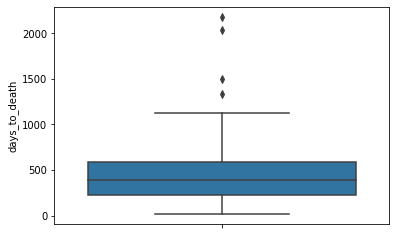

In [50]:
ax = sns.boxplot(x='days_to_death', data=column_metadata, orient="v")

From above plot we can conclude that on average a cancer patient dies in 500 days.

In [21]:
#Info about column_metadata
column_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, aab1-Primary solid Tumor to aapl-Primary solid Tumor
Columns: 124 entries, participant_id to year_of_tobacco_smoking_onset
dtypes: float64(49), int64(10), object(65)
memory usage: 183.7+ KB


In [22]:
# Shape of columns metadata
[x,y] = column_metadata.shape
print("Rows: ", x)
print("Columns: ", y)

#print(type(x))

Rows:  183
Columns:  124


Now I will try to find na values in column metadata

Total 86 columns have missing value, and Total 9659 missing values in dataset


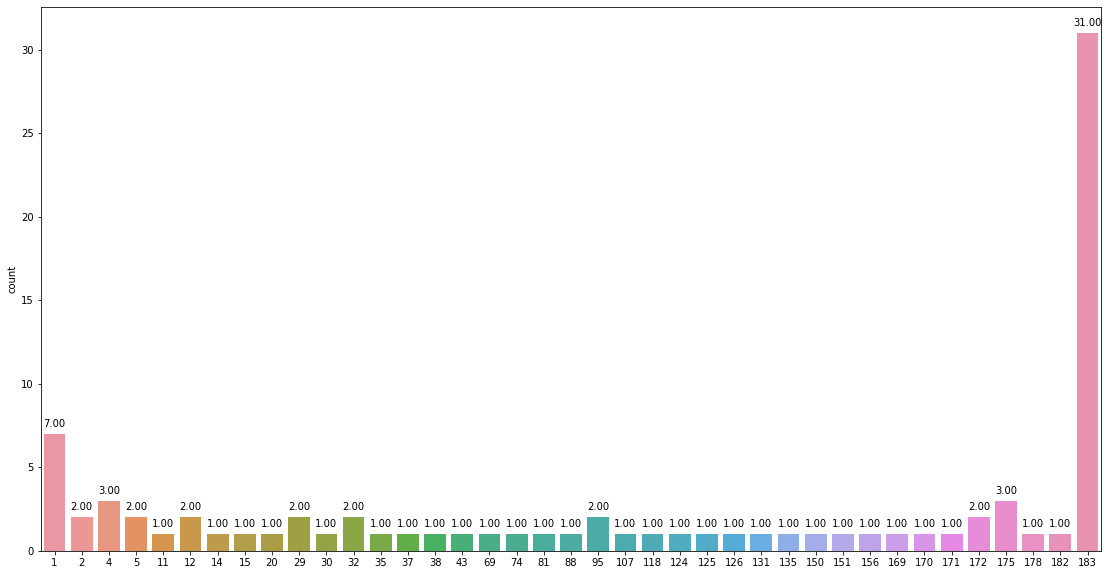

In [65]:
# Number of missing values in each column of column_metadata
missing_val = (column_metadata.isnull().sum())
missing_val_col = missing_val[missing_val > 0].sort_values(ascending=False)
print(f"Total {len(missing_val_col)} columns have missing value, and",
      f"Total {column_metadata.isnull().sum().sum()} missing values in dataset")
plt.figure(figsize=(19, 10))

splot = sns.countplot(data=missing_val_col, x= missing_val_col )
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


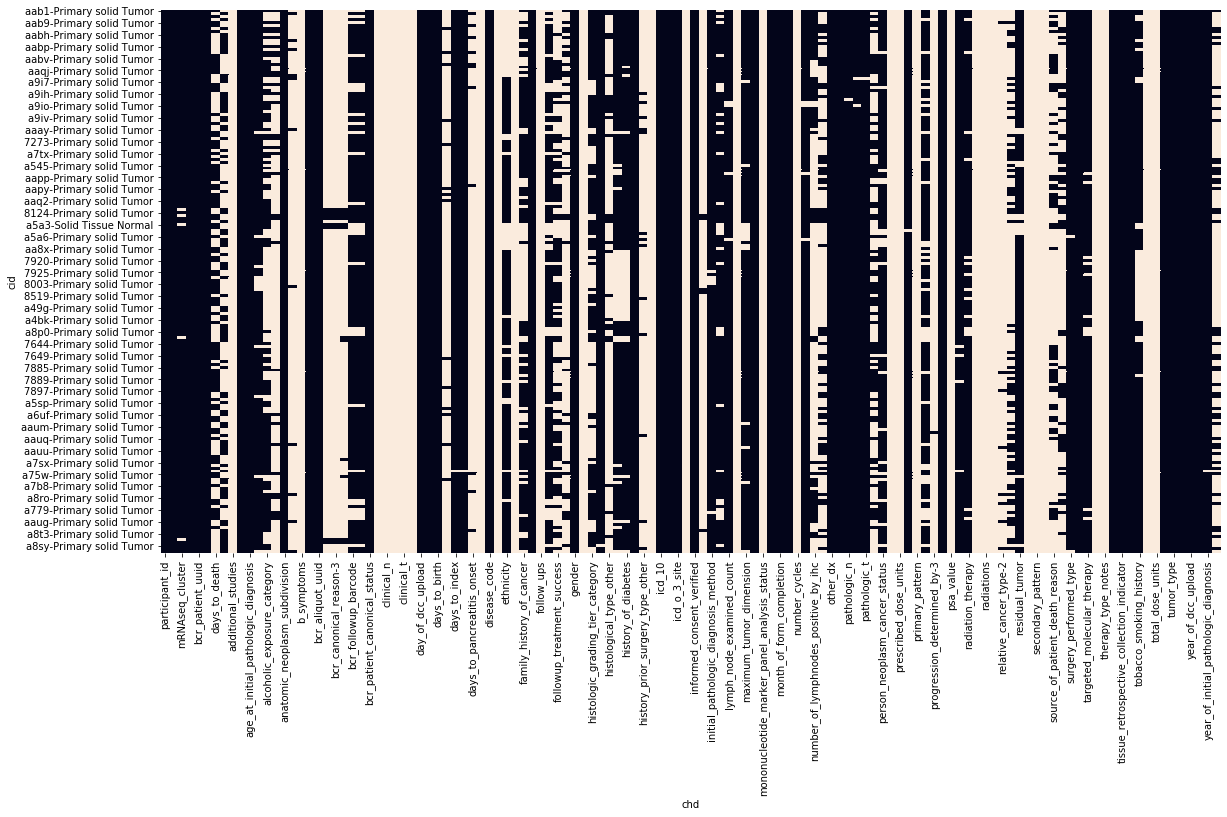

In [24]:
plt.figure(figsize=(19, 10))
sns.heatmap(column_metadata.isnull(), cbar=False)


As you see in the above plots white part shows the missing values in column metadata

We can aslo look at missing values using missingno.
Lets try it.

In [25]:
!pip install missingno
import missingno as msno

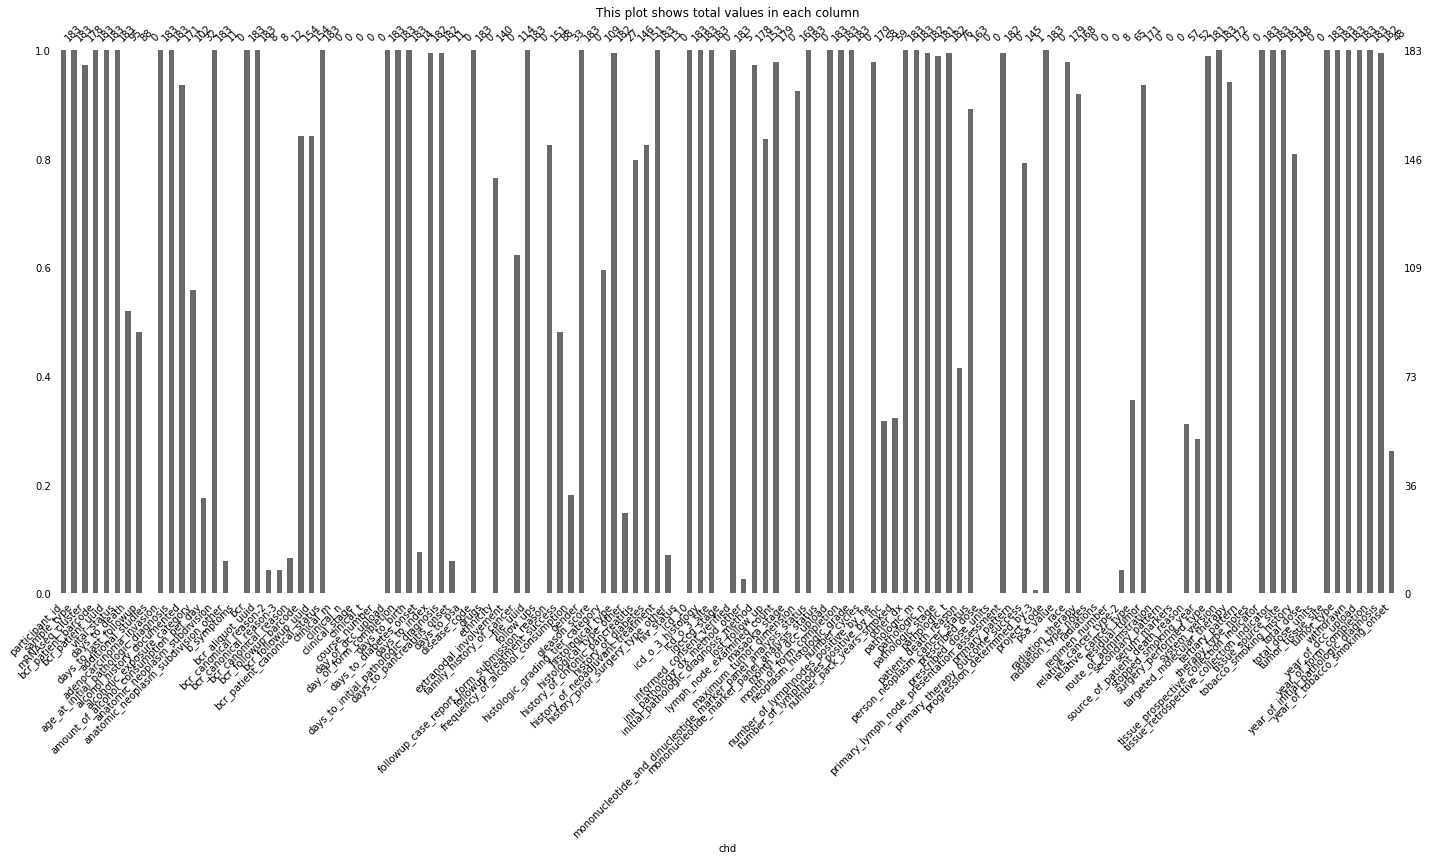

In [26]:
plt.title('This plot shows total values in each column')
msno.bar(column_metadata, labels= True, fontsize = 10)

In [27]:
# Explore each columns of column_meatadata using a simple for loop
for col in column_metadata.columns:
    print(f"{col}:   {len(column_metadata[col].unique())} unique values:")

participant_id:   178 unique values:
sample_type:   3 unique values:
mRNAseq_cluster:   6 unique values:
bcr_patient_barcode:   178 unique values:
bcr_patient_uuid:   178 unique values:
vital_status:   2 unique values:
days_to_death:   90 unique values:
days_to_last_followup:   85 unique values:
additional_studies:   1 unique values:
adenocarcinoma_invasion:   2 unique values:
age_at_initial_pathologic_diagnosis:   45 unique values:
alcohol_history_documented:   3 unique values:
alcoholic_exposure_category:   6 unique values:
amount_of_alcohol_consumption_per_day:   7 unique values:
anatomic_neoplasm_subdivision:   4 unique values:
anatomic_neoplasm_subdivision_other:   11 unique values:
b_symptoms:   1 unique values:
bcr:   1 unique values:
bcr_aliquot_uuid:   178 unique values:
bcr_canonical_reason-2:   2 unique values:
bcr_canonical_reason-3:   2 unique values:
bcr_canonical_reason:   4 unique values:
bcr_followup_barcode:   151 unique values:
bcr_followup_uuid:   151 unique values:

Now Plotting total number of uniques in each column in column meta data

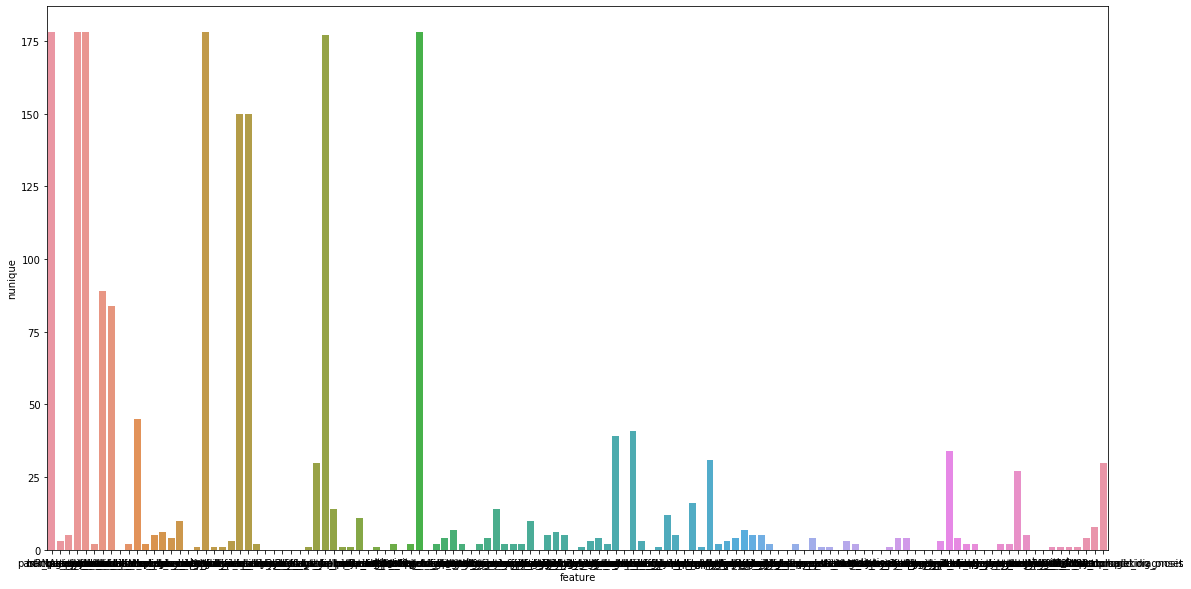

In [68]:
nu = column_metadata.nunique().reset_index()
nu.columns = ['feature','nunique']
plt.figure(figsize=(19, 10))
ax = sns.barplot(x='feature', y='nunique', data=nu)


Dropping columns which have constant values because they're not basically useful in visualization and exploration.

I'll use simple algo: If a column has less than 2 unique values I'll drop it.

In [0]:
for col in column_metadata.columns:
    if len(column_metadata[col].unique())<2:
        column_metadata.drop(columns=col, inplace=True)


In [30]:
#Getting some information about new column_metadata after dropping columns
column_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, aab1-Primary solid Tumor to aapl-Primary solid Tumor
Data columns (total 83 columns):
participant_id                                                  183 non-null object
sample_type                                                     183 non-null object
mRNAseq_cluster                                                 178 non-null float64
bcr_patient_barcode                                             183 non-null object
bcr_patient_uuid                                                183 non-null object
vital_status                                                    183 non-null object
days_to_death                                                   95 non-null float64
days_to_last_followup                                           88 non-null float64
adenocarcinoma_invasion                                         183 non-null object
age_at_initial_pathologic_diagnosis                             183 non-null int64
alcohol_history_

In [31]:
[x,y] = column_metadata.shape #Initially it was (183, 124)
print("Rows :", x)
print("Columns :", y)

Rows : 183
Columns : 83


After dropping constant values column we have only 83 columns remaining,
Note: Initially we had 124 columns

Columns metadata explain about behaviour of patient. Lets see the description of some variables of this data.
* **sample_type** is our **target variable** which tells that which patient have cancer tumor or not.
* **participant_id** unique value for each patient.
* **mRNAseq_cluster**  estimates of the levels of individual isoforms within the cell of RNA sequence.
* **bcr_patient_barcode** and **bcr_patient_uuid** representing the metadata of the participants and their samples.
* **vital_status** Current status of patient(live/death). (may pose data leakage)
* **adenocarcinoma_invasion** Tells about cancer grows and spreads to near cell or not.
* **maximum_tumor_dimension** Size of Tumor, tumor size is strongly related to chances for survival.
* **pathologic_stage** Stage of cancer (amount or spread of cancer in the body)
* **pathologic_m** The M refers to whether the cancer has metastasized. This means that the cancer has spread from the primary tumor to other parts of the body
* **pathologic_n** The N refers to the the number of nearby lymph nodes that have cancer.
* **pathologic_t** The T refers to the size and extent of the main tumor. The main tumor is usually called the primary tumor.

Let's explore some variables:

In [32]:
# Columns meta data
#Getting first five rows of column_metadata
column_metadata.head()

chd,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,alcohol_history_documented,alcoholic_exposure_category,amount_of_alcohol_consumption_per_day,anatomic_neoplasm_subdivision,anatomic_neoplasm_subdivision_other,bcr_aliquot_uuid,bcr_canonical_reason-2,bcr_canonical_reason-3,bcr_canonical_reason,bcr_followup_barcode,bcr_followup_uuid,bcr_patient_canonical_status,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_index,days_to_initial_pathologic_diagnosis,days_to_pancreatitis_onset,ethnicity,family_history_of_cancer,file_uuid,followup_case_report_form_submission_reason,followup_treatment_success,frequency_of_alcohol_consumption,gender,histologic_grading_tier_category,histological_type,histological_type_other,history_of_chronic_pancreatitis,history_of_diabetes,...,icd_o_3_histology,icd_o_3_site,init_pathology_dx_method_other,initial_pathologic_diagnosis_method,lost_follow_up,lymph_node_examined_count,maximum_tumor_dimension,mononucleotide_and_dinucleotide_marker_panel_analysis_status,month_of_form_completion,neoplasm_histologic_grade,number_of_lymphnodes_positive_by_he,number_of_lymphnodes_positive_by_ihc,number_pack_years_smoked,other_dx,pathologic_m,pathologic_n,pathologic_stage,pathologic_t,patient_death_reason,person_neoplasm_cancer_status,primary_lymph_node_presentation_assessment,primary_therapy_outcome_success,progression_determined_by-3,race,radiation_therapy,relative_cancer_type-2,relative_cancer_type,residual_tumor,source_of_patient_death_reason,stopped_smoking_year,surgery_performed_type,system_version,targeted_molecular_therapy,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,tissue_source_site,tobacco_smoking_history,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,1.0,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66.0,NaN,yes,65,yes,weekly drinker,1.0,head of pancreas,NaN,d3f960b2-c69d-4b64-a30f-72f4fa7bb2f9,NaN,NaN,NaN,NaN,NaN,canonical,5,-23962,NaN,0.0,0.0,NaN,NaN,no,cda0d295-ea13-4065-9e5d-8177e827a8f6,NaN,NaN,3.0,male,four tier,pancreas-adenocarcinoma-other subtype,invasive adenocarcinoma,no,no,...,8480,c25.0,NaN,tumor resection,NaN,22.0,4.5,mss,7,g3,7.0,0.0,25.0,no,m0,n1,stage iib,t3,pancreatic cancer,tumor free,yes,complete remission/response,NaN,white,no,NaN,NaN,r0,medical record,1988.0,whipple,7,yes,no,yes,2j,3.0,2014,2012.0,1962.0
aab4-Primary solid Tumor,aab4,Primary solid Tumor,2.0,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729.0,yes,48,no,NaN,NaN,other (please specify),body & tail of pancreas,9daae9d7-747e-44e0-a8f8-3c3f9e3f03f3,NaN,NaN,NaN,tcga-2j-aab4-f62444,ce0b8128-82b9-4164-808f-1b4447134f54,canonical,16,-17794,NaN,0.0,0.0,-292.0,NaN,NaN,d25a44b7-47b1-4a1b-ae08-7bd9aceab9c8,scheduled follow-up submission,NaN,NaN,male,four tier,pancreas-adenocarcinoma-other subtype,"invasive, well-differentiated",yes,no,...,8140,c25.8,NaN,tumor resection,no,34.0,6.8,mss,7,g2,0.0,0.0,NaN,no,m0,n1,stage iib,t2,NaN,tumor free,yes,complete remission/response,NaN,white,no,NaN,NaN,r0,NaN,NaN,distal pancreatectomy,7,yes,no,yes,2j,5.0,2014,2012.0,NaN
aab6-Primary solid Tumor,aab6,Primary solid Tumor,3.0,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293.0,NaN,yes,75,no,NaN,NaN,body of pancreas,NaN,c850368e-6e95-4879-8245-205ddeec6fbd,NaN,NaN,NaN,NaN,NaN,canonical,5,-27600,NaN,0.0,0.0,NaN,NaN,NaN,6f72d859-d6af-4a35-8836-2e086684d90f,NaN,NaN,NaN,male,four tier,pancreas-adenocarcinoma ductal type,NaN,no,no,...,8500,c25.1,NaN,tumor resection,NaN,18.0,5.0,mss,7,g2,0.0,0.0,NaN,no,m0,n0,stage iia,t3,pancreatic cancer,with tumor,yes,progressive disease,NaN,white,no,NaN,NaN,r0,medical record,NaN,distal pancreatectomy,7,yes,no,yes,2j,NaN,201

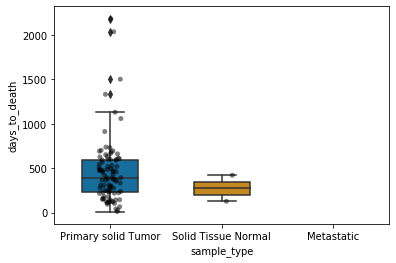

In [38]:

bplot=sns.boxplot(y='days_to_death', x='sample_type', 
                 data=column_metadata, 
                 width=0.5,
                 palette="colorblind")
 

bplot=sns.stripplot(y='days_to_death', x='sample_type', 
                   data=column_metadata, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

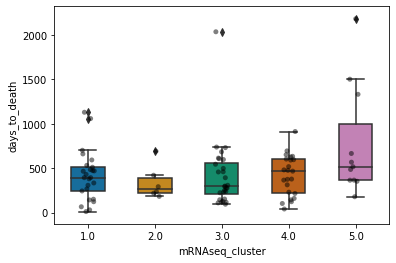

In [39]:

bplot=sns.boxplot(y='days_to_death', x='mRNAseq_cluster', 
                 data=column_metadata, 
                 width=0.5,
                 palette="colorblind")
 

bplot=sns.stripplot(y='days_to_death', x='mRNAseq_cluster', 
                   data=column_metadata, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

In [33]:
column_metadata.adenocarcinoma_invasion.value_counts()

yes    182
no       1
Name: adenocarcinoma_invasion, dtype: int64

In [34]:
column_metadata.vital_status.value_counts()

dead     95
alive    88
Name: vital_status, dtype: int64

In [35]:
[dead, alive] = column_metadata.vital_status.value_counts()
print("Death Percentage due to cancer:", (dead/(dead + alive))*100 )

Death Percentage due to cancer: 51.91256830601093


Now I'll be plotting each RNA sequence cluster Types has how many patient

RNA sequence cluster:3.0 types patient is 24.16% of total 
RNA sequence cluster:4.0 types patient is 22.47% of total 
RNA sequence cluster:1.0 types patient is 21.91% of total 
RNA sequence cluster:5.0 types patient is 16.85% of total 
RNA sequence cluster:2.0 types patient is 14.61% of total 


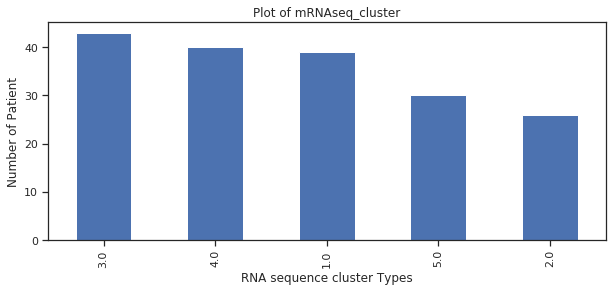

In [0]:
#Plot Using Matplotlib
#sns.set(style="ticks", color_codes=True)
#tips = sns.load_dataset("column_metadata")
conts_mRNA = column_metadata.mRNAseq_cluster.value_counts()
#sns.catplot(x="mRNAseq_cluster",  data=column_metadata , kind="swarm")
plt.figure(figsize=(10,4))
plt.title("Plot of mRNAseq_cluster")
plt.ylabel('Number of Patient')
plt.xlabel('RNA sequence cluster Types')
column_metadata['mRNAseq_cluster'].value_counts().plot(kind='bar')


for i, index in enumerate(conts_mRNA.index):
    val = conts_mRNA.values[i]
    val_pcn = round(((val)/sum(conts_mRNA.values))*100, 2)
    print(f"RNA sequence cluster:{index} types patient is {val_pcn}% of total ")

Text(0.5, 1, 'Vital status of patient by mRNA sequence cluster types ')

<Figure size 720x360 with 0 Axes>

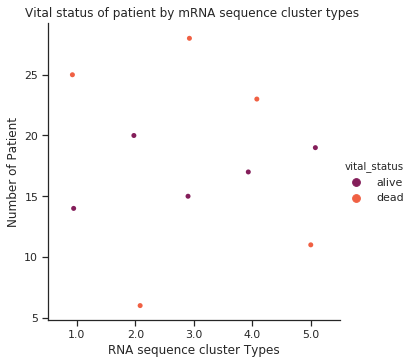

In [0]:
#Plotting RNA sequence cluster Types Vs Number of Patient and their Vital_status
#Catplot
mRNA_seq_group = column_metadata.groupby(['mRNAseq_cluster', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.catplot(x='mRNAseq_cluster', y='counts', hue='vital_status', data=mRNA_seq_group, palette="rocket")
plt.ylabel('Number of Patient')
plt.xlabel('RNA sequence cluster Types')
plt.title('Vital status of patient by mRNA sequence cluster types ')

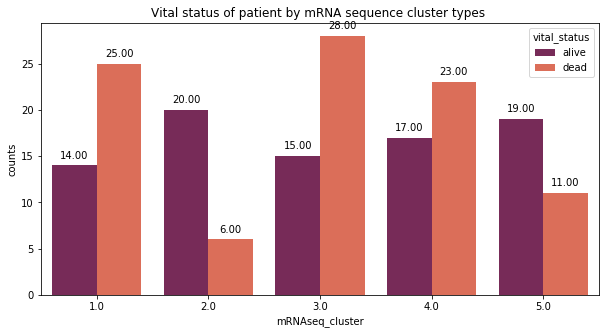

In [70]:
#Plotting RNA sequence cluster Types Vs Number of Patient and their Vital_status
#Barplot
mRNA_seq_group = column_metadata.groupby(['mRNAseq_cluster', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
plt.ylabel('Number of Patient')
plt.xlabel('RNA sequence cluster Types')
plt.title('Vital status of patient by mRNA sequence cluster types ')
splot = sns.barplot(x='mRNAseq_cluster', y='counts', hue='vital_status', data=mRNA_seq_group, palette="rocket")

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [0]:
#Exploring which RNA cluster type has caused how much death

for cluster_type in mRNA_seq_group.mRNAseq_cluster.unique():
    data = mRNA_seq_group[mRNA_seq_group.mRNAseq_cluster==cluster_type]
    live_pcn = round((data[data['vital_status']=='alive']['counts']
                      /sum(data.counts.values))*100, 2)
    dead_pcn = round((data[data['vital_status']=='dead']['counts']/
                     sum(data.counts.values))*100, 2)
    print(f"mRNAseq_cluster type {cluster_type} patient dead {dead_pcn.values[0]}% times")
    print(f"mRNAseq_cluster type {cluster_type} patient alive {live_pcn.values[0]}% times")
    print("\n")
    
    

mRNAseq_cluster type 1.0 patient dead 64.1% times
mRNAseq_cluster type 1.0 patient alive 35.9% times


mRNAseq_cluster type 2.0 patient dead 23.08% times
mRNAseq_cluster type 2.0 patient alive 76.92% times


mRNAseq_cluster type 3.0 patient dead 65.12% times
mRNAseq_cluster type 3.0 patient alive 34.88% times


mRNAseq_cluster type 4.0 patient dead 57.5% times
mRNAseq_cluster type 4.0 patient alive 42.5% times


mRNAseq_cluster type 5.0 patient dead 36.67% times
mRNAseq_cluster type 5.0 patient alive 63.33% times




Conclusion:

From above graphs:

Clearly 65% of time patient are dead if mRNAseq_cluster type is 1 and 3.
mRNAseq_cluster 1, 3, 4 are risky types then 2, 5 

Exploring "sample_type" column of column_metadata

In [0]:
#Considering sample_type
column_metadata.sample_type.value_counts()

Primary solid Tumor    178
Solid Tissue Normal      4
Metastatic               1
Name: sample_type, dtype: int64

In [0]:
#Describing sample_type
column_metadata.sample_type.describe()

count                     183
unique                      3
top       Primary solid Tumor
freq                      178
Name: sample_type, dtype: object

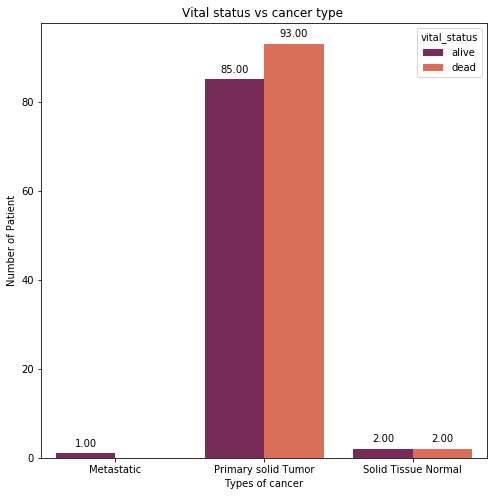

In [72]:
#Plotting Sample Type Vs Number of Patient and their vital_status
#Barplot
sample_type_group = column_metadata.groupby(['sample_type', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(8, 8))
splot = sns.barplot(x='sample_type', y='counts', hue='vital_status', data=sample_type_group, palette="rocket")
plt.ylabel('Number of Patient')
plt.xlabel('Types of cancer')
plt.title('Vital status vs cancer type ')

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


Text(0.5, 1, 'Vital status vs cancer type ')

<Figure size 1008x1008 with 0 Axes>

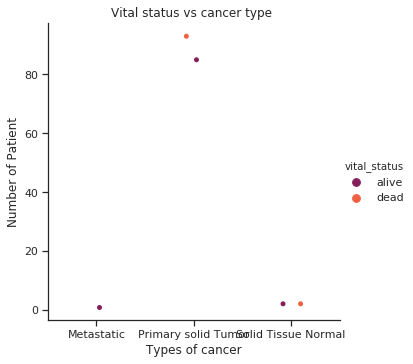

In [0]:
#Plotting Sample Type Vs Number of Patient and their vital_status
#Catplot
sample_type_group = column_metadata.groupby(['sample_type', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(14, 14))
sns.catplot(x='sample_type', y='counts', hue='vital_status', data=sample_type_group, palette="rocket")
plt.ylabel('Number of Patient')
plt.xlabel('Types of cancer')
plt.title('Vital status vs cancer type ')

Conclusion:(From above Graphs)

 Types of tumer not play role in current vital status of patient. There is 50-50 chance of patient are currently alive or dead

Getting some information about:

'adenocarcinoma_invasion' of column_metadata

In [0]:
column_metadata.adenocarcinoma_invasion.value_counts()

yes    182
no       1
Name: adenocarcinoma_invasion, dtype: int64

In [0]:
column_metadata.adenocarcinoma_invasion.describe()


count     183
unique      2
top       yes
freq      182
Name: adenocarcinoma_invasion, dtype: object

In [0]:
print("'adenocarcinoma_invasion': Tells about cancer grows and spreads to near cell or not.")
print("So from above description we can conclude that: Approx every patient cancer grows and spreads into body cells.")

'adenocarcinoma_invasion': Tells about cancer grows and spreads to near cell or not.
So from above description we can conclude that: Approx every patient cancer grows and spreads into body cells.


Plotting patient's vital status according to his/her tissue sample type

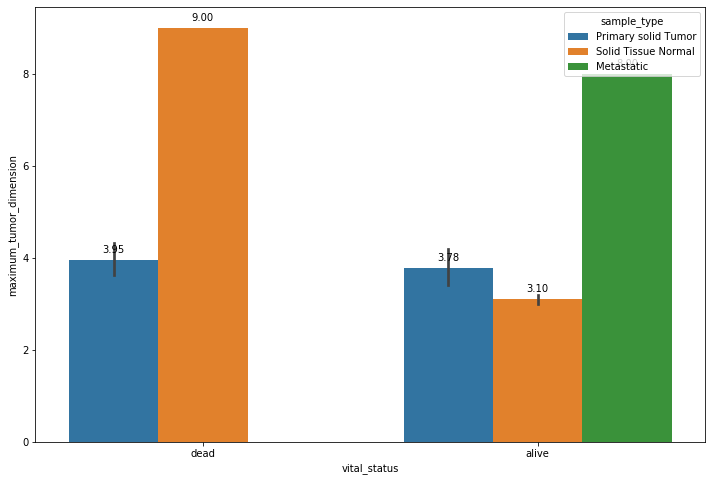

In [75]:
#sns barplot
plt.figure(figsize=(12, 8))
splot = sns.barplot(x='vital_status', y='maximum_tumor_dimension', hue='sample_type', data=column_metadata)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


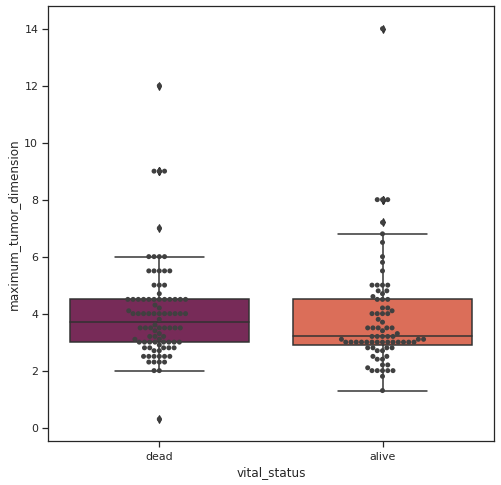

In [0]:
plt.figure(figsize=(8, 8))
ax=sns.boxplot(x='vital_status', y='maximum_tumor_dimension', data=column_metadata, palette="rocket")
ax = sns.swarmplot(x='vital_status', y='maximum_tumor_dimension', data=column_metadata, color=".25")

From the above Plot
Conclusion: On average which has higher tumor dimension are most likely to dead.

Exploring pathologic_stage column of the column metadata

In [0]:
#Exploring pathologic_stage
column_metadata.pathologic_stage.value_counts()

stage iib    122
stage iia     29
stage ib      15
stage ia       5
stage iv       5
stage iii      4
stage i        1
Name: pathologic_stage, dtype: int64

In [0]:
#column_metadata.info()

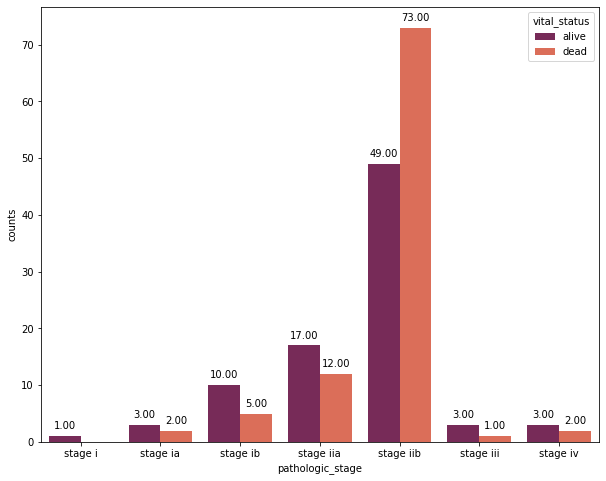

In [77]:
#Plotting pathologic_stage Vs vital_status
#Using Barplot
pathologic_stage_group = column_metadata.groupby(['pathologic_stage', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='pathologic_stage', y='counts', hue='vital_status', data=pathologic_stage_group, palette="rocket")

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


<Figure size 720x720 with 0 Axes>

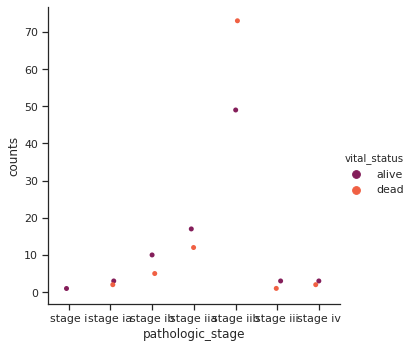

In [0]:
#Plotting pathologic_stage Vs vital_status
#Using catplot
pathologic_stage_group = column_metadata.groupby(['pathologic_stage', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 10))
sns.catplot(x='pathologic_stage', y='counts', hue='vital_status', data=pathologic_stage_group, palette="rocket")

**pathologic stages are as follow:**
* **stage 0:** Abnormal cells are present but have not spread to nearby tissue.Data set have not this stage because approx all **adenocarcinoma_invasion ** value is True.
* **stage i**, **stage ii**,**stage iii** Cancer is present. The higher the number, the **larger the cancer tumor** and the more it has spread into nearby tissues.
* **stage iv** The cancer has spread to distant parts of the body.


Exploring pathologic_m

<Figure size 720x360 with 0 Axes>

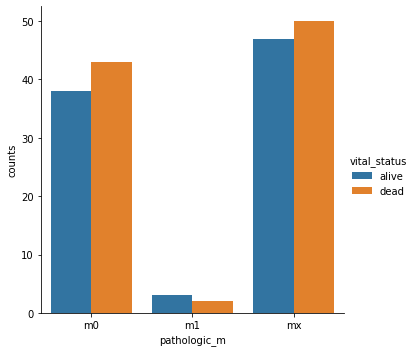

In [79]:
#Plotting pathologic_m Vs vital_status
pathologic_m_group = column_metadata.groupby(['pathologic_m', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))

g = sns.catplot(x="pathologic_m", y="counts",

                hue="vital_status", 

                data=pathologic_m_group, kind="bar",

                );



<Figure size 720x360 with 0 Axes>

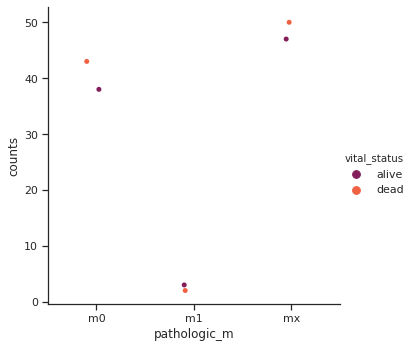

In [0]:
#Plotting pathologic_m Vs vital_status
pathologic_m_group = column_metadata.groupby(['pathologic_m', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.catplot(x='pathologic_m', y='counts', hue='vital_status', data=pathologic_m_group, palette="rocket")


Exploring pathologic_m

<Figure size 720x360 with 0 Axes>

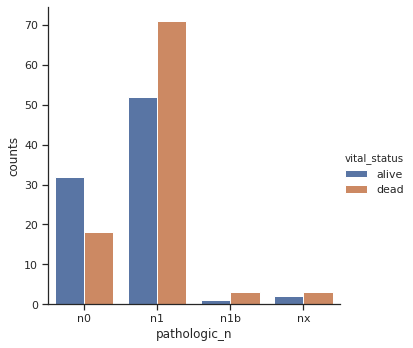

In [0]:
#Plotting pathologic_n Vs vital_status
pathologic_n_group = column_metadata.groupby(['pathologic_n', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
g = sns.catplot(x="pathologic_n", y="counts",

                hue="vital_status", 

                data=pathologic_n_group, kind="bar",

                );

<Figure size 720x360 with 0 Axes>

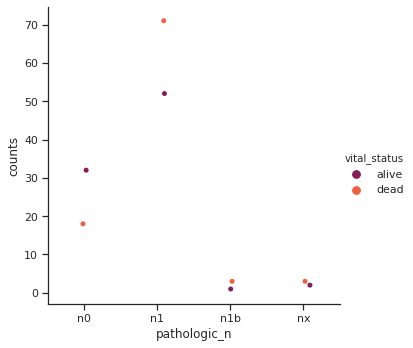

In [0]:
#Plotting pathologic_n Vs vital_status
pathologic_n_group = column_metadata.groupby(['pathologic_n', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.catplot(x='pathologic_n', y='counts', hue='vital_status', data=pathologic_n_group, palette="rocket")


Exploring pathologic_t

<Figure size 720x360 with 0 Axes>

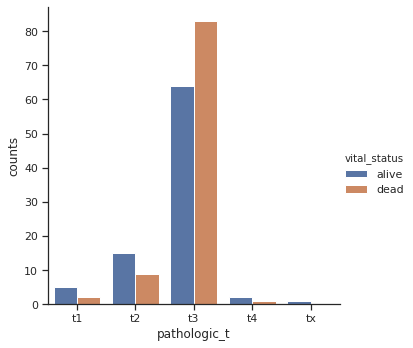

In [0]:
#Plotting pathologic_t Vs vital_status
pathologic_t_group = column_metadata.groupby(['pathologic_t', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))

g = sns.catplot(x="pathologic_t", y="counts",

                hue="vital_status", 

                data=pathologic_t_group, kind="bar",

                );

<Figure size 720x360 with 0 Axes>

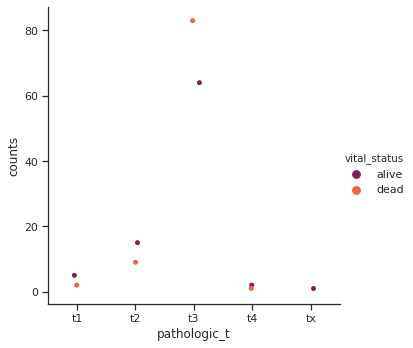

In [0]:
#Plotting pathologic_t Vs vital_status
pathologic_t_group = column_metadata.groupby(['pathologic_t', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))

sns.catplot(x='pathologic_t', y='counts', hue='vital_status', data=pathologic_t_group, palette="rocket")


* **The T refers** to the size and extent of the main tumor. The main tumor is usually called the primary tumor.
* **The N refers** to the the number of nearby lymph nodes that have cancer.
* **The M refers** to whether the cancer has metastasized. This means that the cancer has spread from the primary tumor to other parts of the body.
* majority of patient have **pathologic_t3** and **pathologic_n1** types stages.

###Exploring Row metadata


In [0]:
[x,y] = row_metadata.shape
print("Row: ",x)
print("Column: ",y)
row_metadata.head()

Row:  18465
Column:  0


rhd
rid
SLC35E2
A1BG
A1CF
A2BP1
A2LD1


this rid show the types of RNA sequence(18465 different types of RNA seq).

###Exploring Data Matrix


In [0]:
data_matrix.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,7.5,7.55,7.8,8.15,8.7,8.0,6.5,6.55,8.1,7.3,7.95,7.3,8.35,6.4,8.25,8.55,7.5,7.65,7.45,8.1,8.7,8.0,7.5,9.95,8.7,8.05,7.65,7.65,7.85,8.05,...,8.8,8.25,9.0,8.05,8.5,7.7,8.2,8.8,8.4,8.65,7.45,7.7,7.85,7.7,7.4,8.5,7.15,8.15,8.0,7.8,7.6,6.4,8.55,8.5,7.45,7.5,8.4,8.45,7.95,8.2,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,6.8,5.90,5.7,6.70,5.4,5.8,6.7,6.00,7.0,5.7,6.50,7.8,10.00,7.3,6.10,7.20,6.5,7.10,6.50,9.3,9.5,9.7,8.6,8.00,8.5,6.20,9.00,6.70,5.30,5.10,...,6.8,7.20,7.5,7.80,7.4,5.9,7.7,6.3,7.1,6.00,6.30,6.7,5.20,8.1,7.2,8.1,6.20,7.40,6.6,7.6,5.3,6.3,6.90,6.9,4.70,6.5,6.7,5.20,8.00,7.6,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,6.9,4.60,NaN,6.20,4.5,3.1,5.7,5.30,1.2,4.7,4.20,5.2,5.60,7.5,7.40,5.20,5.6,1.30,2.10,6.9,7.2,6.6,8.3,7.00,8.5,3.10,8.20,5.20,2.70,2.20,...,4.5,5.90,2.9,3.10,6.9,6.9,4.6,6.5,-1.2,0.90,7.00,6.0,4.20,5.4,5.3,1.1,6.20,5.80,6.7,4.9,7.2,4.4,6.40,4.8,7.00,6.4,6.0,5.30,5.60,5.4,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,1.6,0.70,-0.9,0.30,1.3,NaN,NaN,NaN,-0.1,1.3,NaN,NaN,NaN,0.3,1.10,1.50,NaN,1.00,-0.40,3.6,NaN,-0.8,-1.0,NaN,NaN,0.40,NaN,-1.30,NaN,NaN,...,NaN,0.40,-0.1,-1.00,3.7,1.8,-0.3,1.5,-1.2,NaN,0.00,-0.1,NaN,NaN,NaN,NaN,-0.50,-0.70,-1.2,0.1,0.7,-1.0,-0.90,NaN,6.60,0.6,0.4,-1.10,-0.70,1.0,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,7.1,7.70,6.4,6.50,6.9,6.0,8.2,8.40,6.4,7.1,6.40,8.1,6.60,7.7,7.10,7.50,6.0,6.50,7.30,6.3,6.7,5.5,6.4,5.50,3.8,6.60,4.40,7.00,6.80,6.80,...,6.6,6.80,6.8,6.70,6.7,6.2,6.8,7.2,5.3,7.30,8.20,7.7,6.60,8.0,7.5,6.9,6.40,7.00,6.7,7.3,7.5,6.8,7.00,7.1,6.70,7.4,7.1,7.40,6.80,6.1,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70


Describing Data Marix

In [0]:
data_matrix.describe()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
count,17820.000000,17933.000000,17482.000000,17451.000000,17504.000000,17671.000000,17708.000000,18142.000000,17882.000000,17662.000000,18057.000000,17674.000000,17292.000000,17869.000000,17634.000000,17239.000000,17087.000000,17737.000000,17684.00000,17894.000000,17666.000000,17705.000000,17349.000000,17718.000000,18023.000000,17896.000000,17875.000000,17738.000000,17959.000000,17232.000000,17619.000000,17763.000000,17452.000000,17131.000000,16820.000000,17820.000000,17257.000000,18034.000000,17373.000000,17597.000000,...,18019.000000,17851.000000,17974.000000,17867.000000,17839.000000,17949.000000,17991.000000,18092.000000,17547.000000,17961.000000,17623.000000,17563.000000,17302.000000,17619.000000,17808.000000,17817.000000,17440.000000,17788.000000,17988.000000,17815.000000,17782.000000,17755.000000,17998.000000,17959.000000,17375.000000,17714.000000,17762.000000,17755.000000,17822.000000,17858.000000,17778.000000,18008.000000,17845.000000,17886.000000,17839.000000,17884.000000,17872.000000,17636.000000,17766.000000,17531.000000
mean,7.600212,7.639892,7.577106,7.728775,7.796076,7.664129,7.628627,7.698158,7.556334,7.431312,7.712920,7.736352,7.467288,7.720841,7.688663,7.676672,7.795321,7.470202,7.50703,7.645964,7.480432,7.652927,7.569872,7.647712,7.682227,7.719409,7.528210,7.599089,7.533674,7.517050,7.691650,7.812520,7.508697,7.334585,7.412343,7.496552,7.586015,7.738029,7.600925,7.545520,...,7.691537,7.772620,7.679009,7.631707,7.707331,7.550004,7.656711,7.725315,7.413793,7.584083,7.506957,7.788641,7.564080,7.566639,7.539062,7.633657,7.625093,7.675288,7.656225,7.724573,7.465333,7.539005,7.696924,7.639989,7.366786,7.512417,7.509085,7.449710,7.759779,7.779424,7.780396,7.691941,7.575872,7.685672,7.732917,7.597680,7.657147,7.540970,7.431868,7.660132
std,3.387306,3.334036,3.388864,3.184340,3.139338,3.282318,3.324786,3.290414,3.436954,3.562089,3.247335,3.204807,3.528887,3.245264,3.274954,3.217141,3.143650,3.511292,3.45827,3.340978,3.510714,3.324899,3.406347,3.326

Total 183 columns have missing value, and Total 134954 missing values in dataset


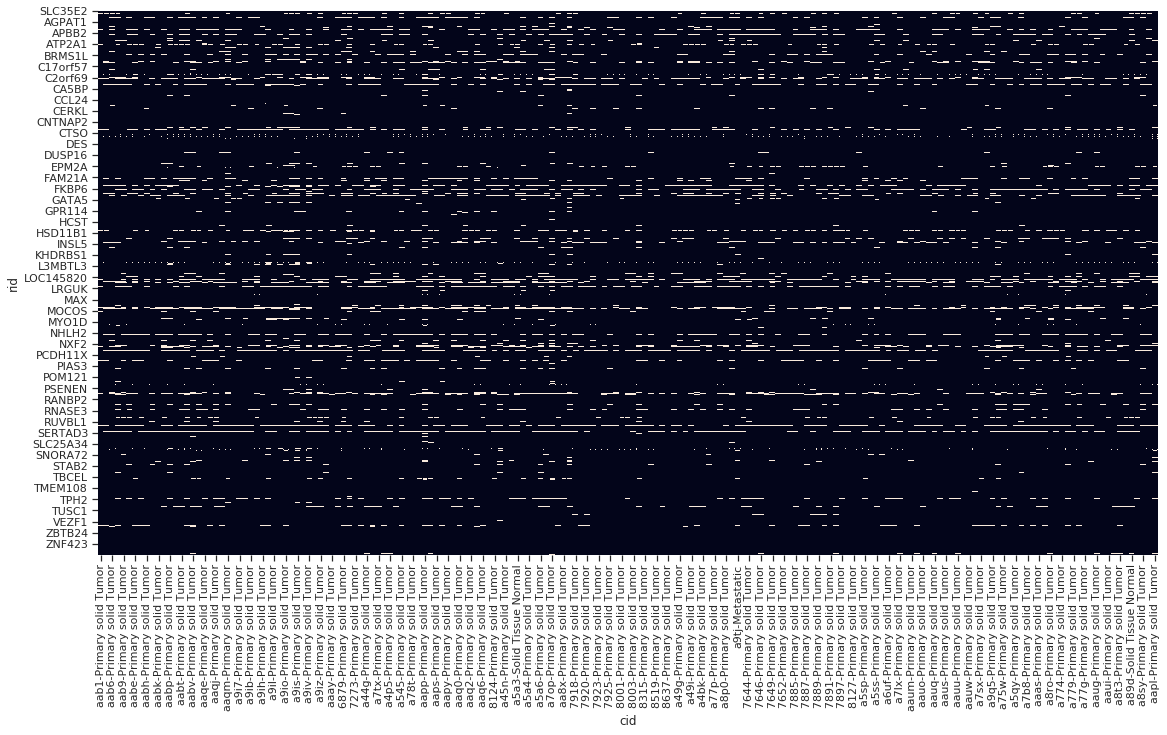

In [0]:
# Number of missing values in each column of data_matrix
missing_val_count_by_column = (data_matrix.isnull().sum())
missing_val_count_by_col = missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False)
print(f"Total {len(missing_val_count_by_col)} columns have missing value, and",
      f"Total {data_matrix.isnull().sum().sum()} missing values in dataset")
plt.figure(figsize=(19, 10))
sns.heatmap(data_matrix.isnull(), cbar=False)

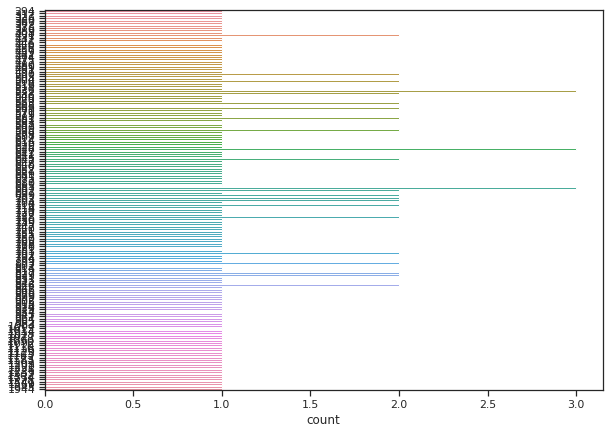

In [0]:
#Plotting using countplot
plt.figure(figsize=(10, 7))
sns.countplot(data=missing_val_count_by_col, y= missing_val_count_by_col )


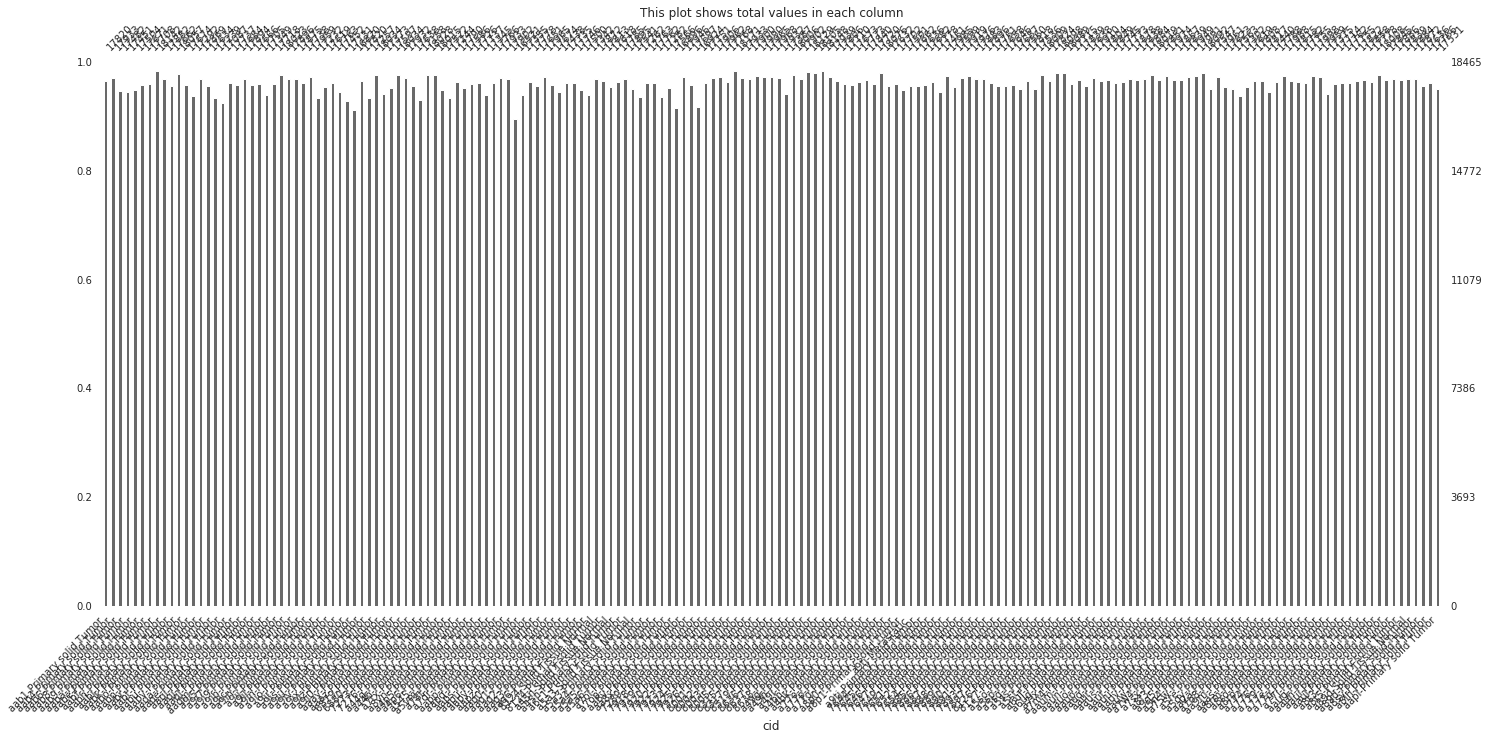

In [0]:
plt.title('This plot shows total values in each column')
msno.bar(data_matrix, labels= True, fontsize = 10)

In [0]:
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18465 entries, SLC35E2 to psiTPTE22
Columns: 183 entries, aab1-Primary solid Tumor to aapl-Primary solid Tumor
dtypes: float32(183)
memory usage: 13.7+ MB


From above plot we can conclude that data is evenly distributed in data_matrix

Now I'll impute the missing values using sklearn

In [0]:
#Imputation of missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputed_data_matrix = pd.DataFrame(imputer.fit_transform(data_matrix))

# Fill in the lines below: imputation removed column names; put them back
imputed_data_matrix.columns = data_matrix.columns
imputed_data_matrix.index = data_matrix.index

imputed_data_matrix.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.200000,8.000000,7.65,8.100000,8.200000,8.2,7.55,8.450000,7.5,7.55,7.800000,8.15,8.7,8.000000,6.500000,6.550000,8.1,7.3,7.950000,7.300000,8.350000,6.4,8.25,8.55,7.50000,7.65,7.45,8.1,8.700000,8.0,7.5,9.950000,8.700000,8.05,7.650000,7.65,7.850000,8.050000,...,8.800000,8.25,9.0,8.05,8.5,7.7,8.2,8.8,8.4,8.650000,7.45,7.7,7.850000,7.700000,7.400000,8.500000,7.15,8.15,8.0,7.8,7.6,6.4,8.55,8.50000,7.45,7.5,8.4,8.45,7.95,8.2,8.45,7.95,8.3,8.050000,8.2,7.25,7.4,7.350000,7.2,9.050000
A1BG,6.40,5.8,6.400000,5.800000,6.70,6.600000,6.300000,6.5,5.70,6.300000,6.8,5.90,5.700000,6.70,5.4,5.800000,6.700000,6.000000,7.0,5.7,6.500000,7.800000,10.000000,7.3,6.10,7.20,6.50000,7.10,6.50,9.3,9.500000,9.7,8.6,8.000000,8.500000,6.20,9.000000,6.70,5.300000,5.100000,...,6.800000,7.20,7.5,7.80,7.4,5.9,7.7,6.3,7.1,6.000000,6.30,6.7,5.200000,8.100000,7.200000,8.100000,6.20,7.40,6.6,7.6,5.3,6.3,6.90,6.90000,4.70,6.5,6.7,5.20,8.00,7.6,7.10,7.10,6.7,7.000000,6.9,7.10,7.3,7.900000,6.0,6.900000
A1CF,4.70,5.7,3.000000,5.100000,4.40,4.200000,1.600000,6.8,6.00,7.431307,6.9,4.60,7.467205,6.20,4.5,3.100000,5.700000,5.300000,1.2,4.7,4.200000,5.200000,5.600000,7.5,7.40,5.20,5.60000,1.30,2.10,6.9,7.200000,6.6,8.3,7.000000,8.500000,3.10,8.200000,5.20,2.700000,2.200000,...,4.500000,5.90,2.9,3.10,6.9,6.9,4.6,6.5,-1.2,0.900000,7.00,6.0,4.200000,5.400000,5.300000,1.100000,6.20,5.80,6.7,4.9,7.2,4.4,6.40,4.80000,7.00,6.4,6.0,5.30,5.60,5.4,5.40,6.40,6.5,4.400000,3.3,3.60,6.2,1.200000,4.9,2.000000
A2BP1,-1.00,1.1,7.577068,7.728812,0.10,7.664174,7.628676,1.7,0.40,-1.500000,1.6,0.70,-0.900000,0.30,1.3,7.676605,7.795213,7.470156,-0.1,1.3,7.480417,7.652951,7.569822,0.3,1.10,1.50,7.52819,1.00,-0.40,3.6,7.691588,-0.8,-1.0,7.334601,7.412444,0.40,7.585991,-1.30,7.600843,7.545454,...,7.691609,0.40,-0.1,-1.00,3.7,1.8,-0.3,1.5,-1.2,7.584074,0.00,-0.1,7.564054,7.566644,7.539044,7.633615,-0.50,-0.70,-1.2,0.1,0.7,-1.0,-0

In [0]:
imputed_data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18465 entries, SLC35E2 to psiTPTE22
Columns: 183 entries, aab1-Primary solid Tumor to aapl-Primary solid Tumor
dtypes: float32(183)
memory usage: 13.7+ MB


In [0]:
print(len(data_matrix.columns.unique()))
print(len(column_metadata.index.unique()))


183
183


Combining both column_metadata and data_matrix

In [0]:
# Lets combine column_metadata and data_matrix
col_to_merge = ['sample_type', 'mRNAseq_cluster','adenocarcinoma_invasion', 'vital_status', 'maximum_tumor_dimension', 'pathologic_stage', 'pathologic_m', 'pathologic_n', 'pathologic_t']
participant_id = column_metadata.participant_id
target_variable = column_metadata.sample_type
column_metadata = column_metadata.set_index('participant_id')
imputed_data_matrix = imputed_data_matrix.rename(columns=participant_id).T

imputed_data_matrix.head()

rid,SLC35E2,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,...,ZP3,ZPBP2,ZPLD1,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1,7.45,6.4,4.7,-1.000000,7.5,6.400000,14.3,10.6,8.8,1.000000,9.4,-1.000000,10.2,9.2,4.8,10.2,9.6,11.8,7.600244,8.6,8.9,11.3,8.6,7.5,8.1,10.6,10.0,9.4,4.4,5.8,1.8,7.4,1.000000,7.8,10.4,9.7,1.0,8.1,7.9,9.3,...,7.7,7.600244,3.9,9.4,9.4,5.5,8.1,4.0,7.2,6.9,9.1,1.5,6.0,8.0,7.3,3.4,8.7,7.1,0.5,6.0,0.5,8.6,7.1,8.8,8.2,8.8,8.1,7.0,8.6,8.1,8.6,6.2,9.0,9.9,7.600244,9.2,12.9,10.1,9.3,5.5
aab4,8.10,5.8,5.7,1.100000,6.8,7.639954,14.0,10.2,5.6,-1.200000,9.1,-0.200000,10.3,5.0,6.3,10.4,9.8,11.4,0.300000,8.4,8.7,11.6,9.0,7.5,8.2,10.2,8.1,9.3,4.9,5.7,6.3,4.9,3.000000,8.5,10.9,9.5,0.8,9.0,6.0,9.7,...,6.6,7.639954,5.7,9.6,10.2,5.4,7.9,5.0,7.0,6.1,9.8,3.1,6.0,7.6,6.2,3.7,8.5,7.5,-1.2,5.7,0.8,7.9,6.2,9.2,6.9,9.4,8.1,7.5,8.7,8.1,8.8,5.8,8.5,10.0,7.639954,9.3,12.4,9.8,8.9,4.5
aab6,7.20,6.4,3.0,7.577068,7.3,10.800000,13.1,10.1,0.2,0.200000,9.7,7.577068,9.2,2.8,5.9,9.9,9.8,11.1,2.200000,8.4,8.8,11.4,9.3,6.7,7.3,10.3,7.3,8.4,4.7,6.1,7.4,8.0,1.800000,9.2,10.6,8.0,4.1,7.7,5.7,10.4,...,7.8,7.577068,3.0,9.5,10.4,4.9,7.8,5.2,6.6,5.4,9.9,2.9,6.3,7.7,6.6,2.4,7.9,6.9,2.0,5.7,0.8,8.2,5.7,8.8,5.3,8.7,7.3,7.0,8.8,8.4,9.1,3.9,8.1,10.0,-0.800000,9.4,13.5,9.8,9.2,4.7
aab8,8.00,5.8,5.1,7.728812,7.5,4.100000,13.8,8.6,3.2,-0.100000,9.6,-0.100000,9.4,7.7,6.4,10.5,9.2,11.6,-0.100000,8.7,9.1,11.4,9.4,7.7,7.8,10.1,8.3,8.4,5.4,6.6,7.3,7.1,7.728812,9.0,10.0,7.9,5.2,7.6,6.7,10.4,...,6.6,7.728812,0.9,9.7,10.6,5.7,8.0,6.0,7.6,6.5,9.2,0.9,5.9,7.1,6.8,4.0,8.9,7.4,4.2,6.1,2.5,8.0,6.1,9.8,6.3,8.8,8.0,7.4,8.6,8.6,8.9,5.2,8.5,9.7,1.900000,9.4,12.5,9.7,9.3,6.4
aab9,7.65,6.7,4.4,0.100000,7.4,9.300000,14.6,10.1,5.7,7.796027,9.8,7.796027,9.3,7.0,6.5,10.1,9.8,11.2,0.100000,8.4,9.3,11.4,9.4,7.2,8.3,10.3,8.6,9.4,5.9,6.2,6.1,6.0,1.700000,8.7,10.0,9.3,3.3,8.8,7.7,9.2,...,8.1,0.100000,4.9,9.7,9.7,4.8,8.1,5.1,7.3,6.2,10.1,2.4,5.7,7.9,7.0,4.3,8.6,8.0,1.7,6.1,0.1,8.4,7.0,9.9,6.9,8.6,8.0,7.0,8.9,8.2,8.4,5.9,8.6,9.9,0.100000,9.3,13.0,10.1,9.2,4.9


In [0]:
for col in col_to_merge:
    imputed_data_matrix[col] = column_metadata[col]
imputed_data_matrix.head(2)

rid,SLC35E2,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,...,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,sample_type,mRNAseq_cluster,adenocarcinoma_invasion,vital_status,maximum_tumor_dimension,pathologic_stage,pathologic_m,pathologic_n,pathologic_t
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1,7.45,6.4,4.7,-1.0,7.5,6.400000,14.3,10.6,8.8,1.0,9.4,-1.0,10.2,9.2,4.8,10.2,9.6,11.8,7.600244,8.6,8.9,11.3,8.6,7.5,8.1,10.6,10.0,9.4,4.4,5.8,1.8,7.4,1.0,7.8,10.4,9.7,1.0,8.1,7.9,9.3,...,6.9,9.1,1.5,6.0,8.0,7.3,3.4,8.7,7.1,0.5,6.0,0.5,8.6,7.1,8.8,8.2,8.8,8.1,7.0,8.6,8.1,8.6,6.2,9.0,9.9,7.600244,9.2,12.9,10.1,9.3,5.5,Primary solid Tumor,1.0,yes,dead,4.5,stage iib,m0,n1,t3
aab4,8.10,5.8,5.7,1.1,6.8,7.639954,14.0,10.2,5.6,-1.2,9.1,-0.2,10.3,5.0,6.3,10.4,9.8,11.4,0.300000,8.4,8.7,11.6,9.0,7.5,8.2,10.2,8.1,9.3,4.9,5.7,6.3,4.9,3.0,8.5,10.9,9.5,0.8,9.0,6.0,9.7,...,6.1,9.8,3.1,6.0,7.6,6.2,3.7,8.5,7.5,-1.2,5.7,0.8,7.9,6.2,9.2,6.9,9.4,8.1,7.5,8.7,8.1,8.8,5.8,8.5,10.0,7.639954,9.3,12.4,9.8,8.9,4.5,Primary solid Tumor,2.0,yes,alive,6.8,stage iib,m0,n1,t2


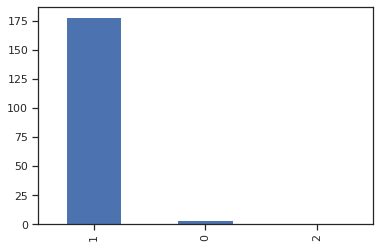

In [0]:
def cat_to_numeric(x):
    if x=='Solid Tissue Normal':
        return 0
    elif x=='Primary solid Tumor':
        return 1
    else:
        return 2
target_variable = target_variable.map(lambda x: cat_to_numeric(x))
target_variable.value_counts().plot(kind='bar')

In [0]:
def remove_nulls(df):

    rows = df.shape[0]
    columns = df.shape[1]
    null_cols = 0
    list_of_nulls_cols = []
    for col in list(df.columns):
        null_values_rows = df[col].isnull().sum()
        null_rows_pcn = round(((null_values_rows)/rows)*100, 2)
        col_type = df[col].dtype
        if null_values_rows > 0:
            print("The column {} has {} null values. It is {}% of total rows.".format(col, null_values_rows, null_rows_pcn))
            print("The column {} is of type {}.\n".format(col, col_type))
            null_cols += 1
            list_of_nulls_cols.append(col)
            df[[col]] = df[[col]].apply(lambda x: x.fillna(method='backfill'))
            print(f"The column {col} has removed {null_values_rows} null values")
    null_cols_pcn = round((null_cols/columns)*100, 2)
    print("The DataFrame has {} columns with null values. It is {}% of total columns.".format(null_cols, null_cols_pcn))
    return df

data_matrix = remove_nulls(imputed_data_matrix.select_dtypes(exclude='object'))

The column mRNAseq_cluster has 5 null values. It is 2.73% of total rows.
The column mRNAseq_cluster is of type float64.

The column mRNAseq_cluster has removed 5 null values
The column maximum_tumor_dimension has 14 null values. It is 7.65% of total rows.
The column maximum_tumor_dimension is of type float64.

The column maximum_tumor_dimension has removed 14 null values
The DataFrame has 2 columns with null values. It is 0.01% of total columns.


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
print(imputed_data_matrix.isnull().sum().sum())

23


Applying Dimensionality Reduction Techniques (PCA)

In [0]:

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(imputed_data_matrix.drop(columns=col_to_merge))

from sklearn.decomposition import PCA as sklearnPCA
n_components = 100
sklearn_pca = sklearnPCA(n_components=n_components)
Y_sklearn = sklearn_pca.fit_transform(X_std)

###Variance of the PCA?

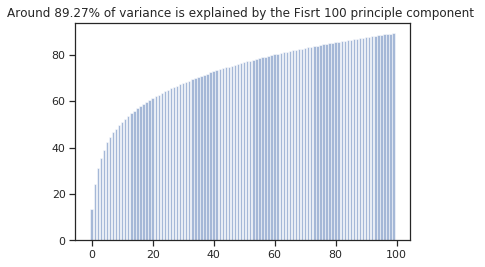

In [0]:
cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

explained_var = round(sklearn_pca.explained_variance_ratio_.sum()*100, 2)

cum_sum = cum_sum*100


plt.bar(range(n_components), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title(f"Around {explained_var}% of variance is explained by the Fisrt {n_components} principle component ");

### Visualize the data whole data using PCA.

[]

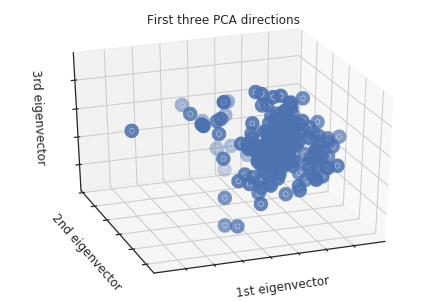

In [0]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
X_reduced  = sklearn_pca.fit_transform(X_std)
Y=target_variable
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

Text(0.5, 1.0, 'This is the 2D Transformation of above graph ')

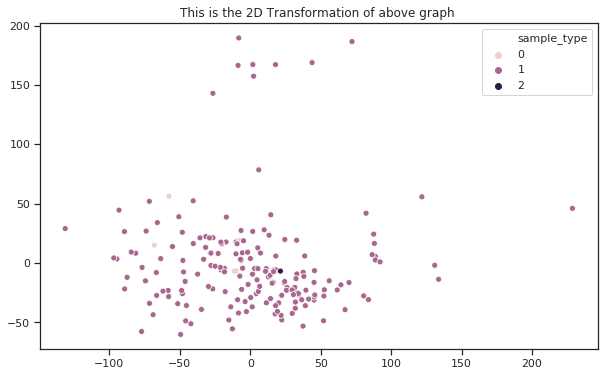

In [0]:
fig = plt.figure(1, figsize=(10,6))
sns.scatterplot(X_reduced[:, 0],  X_reduced[:, 1],hue=Y)
plt.title("This is the 2D Transformation of above graph ")

the neuroendocrine tumors clearly not separable from the adenocarcinoma tumors?

Lets Remove the neuroendocrine tumors from the dataset so that it contains only the adenocarcinoma tumor samples. The histology for the different tumor samples is contained in the my_data.

In [0]:
imputed_data_matrix = imputed_data_matrix[imputed_data_matrix['adenocarcinoma_invasion']=='yes']
imputed_data_matrix.shape

(182, 18474)

**Interferons (IFNs)** are a group of signaling proteins made and released by host cells in response to the presence of several pathogens, such as viruses, bacteria, parasites, and also tumor cells. Type I interferons (IFNs) are a large subgroup of interferon proteins that help regulate the activity of the immune system. The genes responsible for type 1 Interferons is called Type 1 IFN signature and consists a set of 25 genes in homo sapiens.

Let's read these 25 IFN signature

In [0]:
ifn_sig = pd.read_csv('type1_IFN.txt', header=None)
ifn_sig.columns = ['member']
ifn_sig.head()

,member
0,IFIT1
1,IFI44
2,IFIT3
3,MX2
4,OAS1


In [0]:
ifn_sig_data = imputed_data_matrix[ifn_sig['member'].to_list()]
ifn_sig_data.shape

(182, 25)

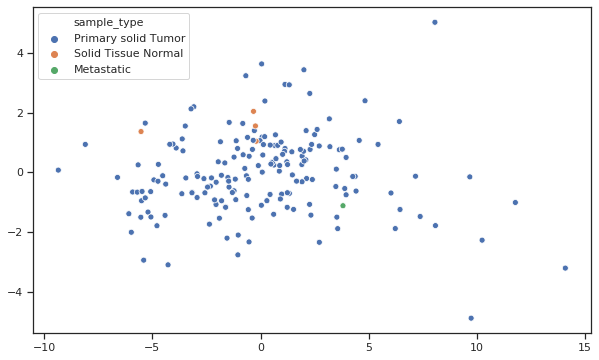

In [0]:
X_std = StandardScaler().fit_transform(ifn_sig_data)
n_components = 2
sklearn_pca = sklearnPCA(n_components=n_components)
X_reduced  = sklearn_pca.fit_transform(X_std)
fig = plt.figure(1, figsize=(10,6))
sns.scatterplot(X_reduced[:, 0],  X_reduced[:, 1],hue=imputed_data_matrix['sample_type'])


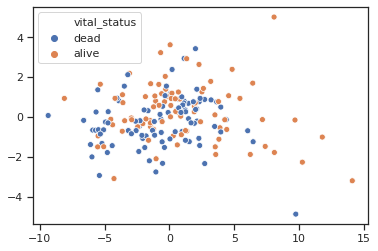

In [0]:
sns.scatterplot(X_reduced[:, 0],  X_reduced[:, 1],hue=imputed_data_matrix['vital_status'])


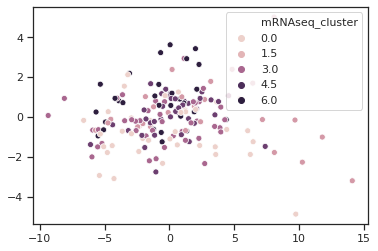

In [0]:
sns.scatterplot(X_reduced[:, 0],  X_reduced[:, 1],hue=imputed_data_matrix['mRNAseq_cluster'])

In [0]:
!pip install gsva
from GSVA import gsva
from plotnine import *
from sklearn.manifold import TSNE

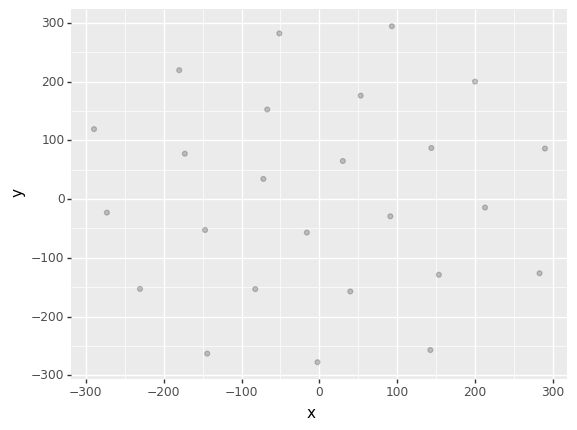

<ggplot: (8746169711003)>

In [0]:
XV = TSNE(n_components=2).\
    fit_transform(ifn_sig_data.T)
df = pd.DataFrame(XV).rename(columns={0:'x',1:'y'})
(ggplot(df,aes(x='x',y='y'))
 + geom_point(alpha=0.2)
)